###**Image** **Classification** **on** **CIFAR10** **Using** **SVM** **classifier** **with** **dimensionality** **reduction** **using** **PCA**

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load the CIFAR10 dataset
from tensorflow.keras.datasets import cifar10

baseDir = os.path.dirname(os.path.abspath('__file__')) + '/'
classesName = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()
xVal = xTrain[49000:, :].astype(float)
yVal = np.squeeze(yTrain[49000:, :])
xTrain = xTrain[:49000, :].astype(float)
yTrain = np.squeeze(yTrain[:49000, :])
yTest = np.squeeze(yTest)
xTest = xTest.astype(float)

print(xTrain.shape)
print(yTrain.shape)
xTrain = np.reshape(xTrain, (xTrain.shape[0], -1)) # The -1 means that the corresponding dimension is calculated from the other given dimensions.
xVal = np.reshape(xVal, (xVal.shape[0], -1))
xTest = np.reshape(xTest, (xTest.shape[0], -1))
print(xTrain.shape)
print(xTrain[0])

# Limiting the dataset size for faster processing
xTrain = xTrain[:10000, :]
yTrain = yTrain[:10000]
print(xTrain.shape)
print(yTrain.shape)


(49000, 32, 32, 3)
(49000,)
(49000, 3072)
[ 59.  62.  63. ... 123.  92.  72.]
(10000, 3072)
(10000,)


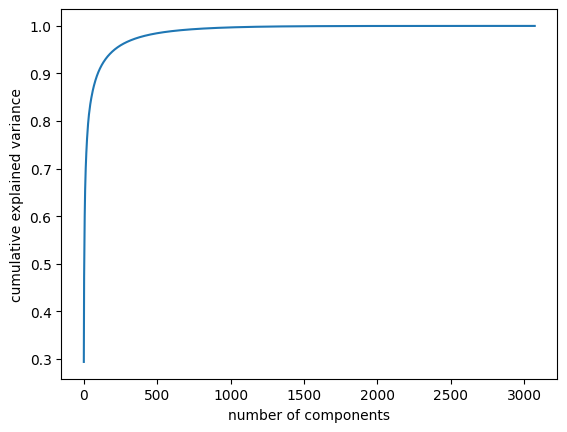

In [4]:
# Cumulative Explained variance against Number Of Components
combined=np.vstack((xTrain,xVal))
from sklearn.decomposition import PCA
pca = PCA().fit(combined)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [5]:
print(pca.explained_variance_ratio_.cumsum()[149])
print(pca.explained_variance_ratio_.cumsum()[499])

0.9306473212588602
0.9846410735518448


In [6]:
# Reducing to 150 dimensions.
pca = PCA(n_components=150) # project from 3072 to 150 dimensions
pca.fit(combined)
projected = pca.transform(combined)
print(pca.explained_variance_.shape)
print(pca.components_.shape)
print(combined.shape)
print(projected.shape)

(150,)
(150, 3072)
(11000, 3072)
(11000, 150)


In [7]:
x_train=projected[:10000,:]
y_train=yTrain

x_test=projected[10000:,:]
y_test=yVal

In [8]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10000, 150)
(10000,)
(1000, 150)
(1000,)


In [9]:
from sklearn import svm
svc = svm.SVC(probability=False,  kernel="poly", C=1)
svc.fit(x_train, y_train)

SVC(C=1, kernel='poly')

In [10]:
# Accuracy calculation for train set
pred = svc.predict(x_train)
acc_train = np.mean(pred == y_train)
print('Train Accuracy = {0:f}'.format(acc_train))
print(pred)

Train Accuracy = 0.675600
[6 9 9 ... 1 1 7]


In [11]:
# Accuracy calculation for test set
pred = svc.predict(x_test)
acc_test = np.mean(pred == y_test)
print('Test Accuracy = {0:f}'.format(acc_test))
print(pred)

Test Accuracy = 0.402000
[8 4 2 7 2 2 0 8 2 3 7 9 9 2 4 3 2 2 8 2 2 1 4 2 8 2 9 2 2 8 4 1 2 4 3 9 2
 7 2 3 1 6 8 8 6 1 2 4 5 2 0 2 5 4 8 4 6 9 7 2 8 2 2 9 9 9 1 0 4 3 2 7 2 4
 4 2 7 2 3 0 6 2 1 3 1 8 8 8 2 2 8 0 2 2 6 6 1 4 4 2 8 5 8 7 2 6 4 0 8 4 4
 7 9 3 4 1 3 2 2 6 3 4 1 9 2 9 2 2 0 3 0 2 9 2 8 6 2 9 4 7 2 4 2 2 2 6 6 1
 9 2 1 2 0 2 0 2 2 1 9 2 8 8 7 1 0 1 8 8 0 0 3 2 2 8 0 7 9 2 2 4 8 9 9 7 8
 2 1 4 5 2 5 8 4 8 8 8 8 3 4 7 4 8 2 7 1 1 9 2 9 6 4 9 1 2 2 2 3 9 6 8 2 2
 3 2 2 1 4 5 2 4 1 4 1 3 1 8 0 2 8 1 2 6 4 2 1 0 8 8 2 6 2 4 2 8 1 0 2 8 9
 5 4 6 7 2 7 2 9 5 2 1 4 3 4 9 2 2 2 6 2 9 4 2 6 2 1 4 1 9 5 6 2 8 4 4 4 9
 8 2 2 3 7 3 4 9 5 6 8 2 8 6 2 4 4 2 2 6 4 4 4 4 6 4 8 7 4 2 4 6 2 4 8 7 2
 5 2 4 8 1 0 2 8 4 6 4 8 2 2 0 4 2 2 2 4 4 9 7 2 2 8 4 2 9 2 7 2 1 6 7 4 9
 9 8 8 0 8 2 2 5 2 8 3 1 6 1 2 9 3 2 8 2 7 4 3 8 6 1 4 7 2 7 8 1 4 6 1 9 4
 3 2 1 6 1 2 9 4 8 1 4 4 3 8 6 4 0 3 4 1 8 6 8 2 2 4 6 8 1 1 5 6 0 6 0 8 8
 6 8 8 6 6 2 2 7 3 4 7 4 6 0 4 4 7 1 4 3 6 8 0 0 3 1 3 0 7 9 2 4 2 9 2 8 6


In [26]:
# Reducing to 500 dimensions.
pca = PCA(n_components=500) # project from 3072 to 500 dimensions
pca.fit(combined)
projected = pca.transform(combined)
print(pca.explained_variance_.shape)
print(pca.components_.shape)
print(combined.shape)
print(projected.shape)

(500,)
(500, 3072)
(11000, 3072)
(11000, 500)


In [27]:
x_train=projected[:10000,:]
y_train=yTrain

x_test=projected[10000:,:]
y_test=yVal

In [28]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10000, 500)
(10000,)
(1000, 500)
(1000,)


In [30]:
from sklearn import svm
svc = svm.SVC(probability=False,  kernel="poly", C=1)
svc.fit(x_train, y_train)

SVC(C=1, kernel='poly')

In [31]:
# Accuracy calculation for training set
pred = svc.predict(x_train)
acc_train = np.mean(pred == y_train)
print('Train Accuracy = {0:f}'.format(acc_train))
print(pred)

Train Accuracy = 0.711600
[6 9 9 ... 1 1 7]


In [32]:
# Accuracy calculation for test set
pred = svc.predict(x_test)
acc_test = np.mean(pred == y_test)
print('Test Accuracy = {0:f}'.format(acc_test))
print(pred)

Test Accuracy = 0.395000
[8 5 2 7 2 2 0 8 2 3 4 9 9 2 4 3 2 2 8 2 2 1 4 2 8 2 9 2 2 3 4 1 4 4 3 9 2
 7 2 3 1 6 8 8 6 1 2 7 5 2 0 4 5 4 8 4 4 9 7 2 8 2 2 9 9 9 1 0 4 3 2 7 2 4
 4 2 7 2 3 0 6 2 1 2 1 8 8 8 2 2 8 0 2 2 6 6 1 4 4 2 8 5 8 7 2 6 4 0 8 4 4
 7 9 3 4 1 3 2 2 6 3 4 1 9 2 9 2 2 0 3 0 2 9 2 8 6 2 4 4 7 2 4 2 2 2 6 6 1
 9 2 1 2 0 2 0 2 2 1 1 2 8 8 7 1 0 1 8 8 8 0 3 2 2 2 0 2 9 2 2 4 8 9 9 7 8
 2 1 4 5 2 5 8 4 8 8 8 8 3 4 4 4 8 2 7 1 1 9 2 9 6 4 9 1 2 2 2 3 9 7 8 2 2
 3 2 2 9 4 5 2 4 1 4 1 3 1 8 0 2 8 1 2 6 4 2 1 0 8 8 2 6 2 4 2 8 1 0 2 8 9
 5 4 6 7 2 7 2 9 3 2 1 4 3 4 9 2 2 2 6 2 9 4 2 6 2 9 4 3 9 5 6 2 8 4 4 4 9
 8 2 2 3 7 3 2 9 5 6 8 2 8 6 2 2 4 2 2 6 4 4 4 4 6 4 8 7 4 2 4 3 2 4 8 7 2
 5 2 4 8 1 0 2 8 2 6 4 8 2 2 0 4 2 2 2 4 2 9 7 2 2 8 4 2 9 2 7 2 1 6 4 4 9
 9 8 8 0 8 2 2 5 2 8 3 1 6 1 2 9 3 2 8 2 7 4 3 8 6 1 4 7 2 7 8 1 4 6 1 9 4
 2 2 1 6 1 2 9 4 8 1 4 4 3 0 6 4 0 2 4 1 8 6 8 2 2 4 6 8 1 1 5 6 0 6 0 8 8
 6 8 8 6 6 2 2 7 3 7 7 4 6 0 4 4 7 4 4 3 6 8 0 0 3 1 3 0 7 9 2 4 2 9 2 8 6


## **Conclusion**
Here, we can see that the test accuracy decreases from 40.2% to 39.6% if we increase the number of components from 150 to 500.


---



## Image Retrieval

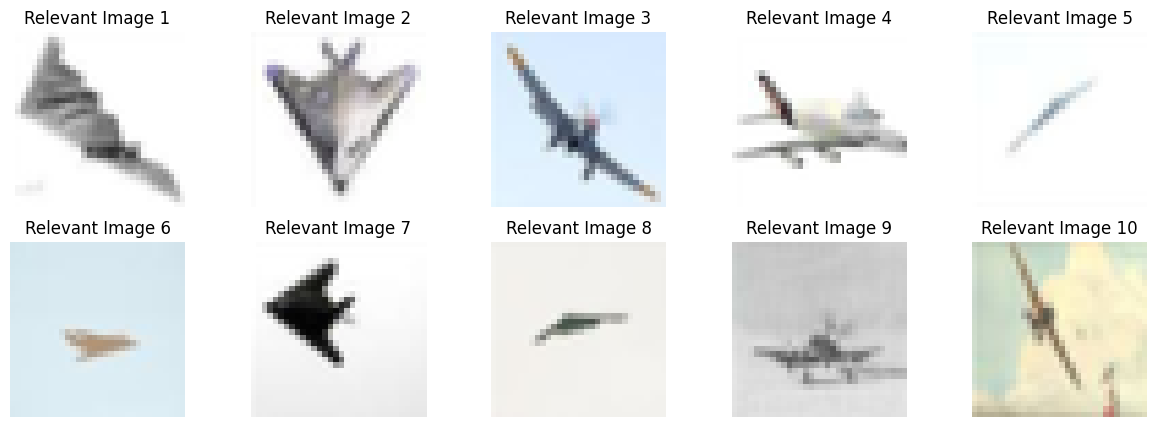

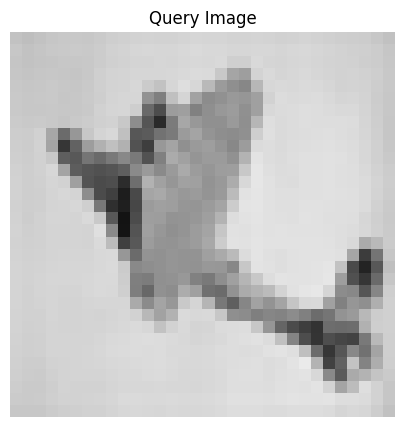

In [35]:
from sklearn.metrics.pairwise import cosine_similarity

# 1. Extract features from the query image
query_image_index = np.random.randint(0, len(xTest)) #Random image selection from test set
query_image = xTest[query_image_index]
query_feature = pca.transform(query_image.reshape(1, -1))  # Transform the query image using PCA

# 2. Predict the class label of the query image using the trained SVM classifier
predicted_label = svc.predict(query_feature)[0]

# 3. Retrieve images from the dataset that belong to the same class as the predicted label
relevant_indices = np.where(yTrain == predicted_label)[0]
relevant_images = xTrain[relevant_indices]

# 4. Calculate cosine similarities between the query image and relevant images
cosine_similarities = cosine_similarity(query_feature, pca.transform(relevant_images))

# 5. Sort relevant images based on cosine similarities and get the top 10
sorted_indices = np.argsort(cosine_similarities[0])[::-1][:10]
top_10_relevant_images = relevant_images[sorted_indices]

# 6. Display the top 10 relevant images
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(top_10_relevant_images[i].reshape(32, 32, 3).astype(np.uint8))
    plt.title(f'Relevant Image {i+1}')
    plt.axis('off')

# Display the query image
plt.figure(figsize=(5, 5))
plt.imshow(query_image.reshape(32, 32, 3).astype(np.uint8))
plt.title('Query Image')
plt.axis('off')
plt.show()

